In [59]:
%load_ext autoreload
%autoreload 2

import torch
import experiments.multiclass_classification as exp
from experiments import mnist

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
device = torch.device("cuda")

In [4]:
batch_size = 32
layers = [
    (mnist.IMAGE_SIZE * mnist.IMAGE_SIZE, 400),
    (400, 400),
    (400, 10)
]

In [5]:
torch.manual_seed(42)

trainloader = mnist.flattened_trainloader(batch_size)
testloader = mnist.flattened_testloader(batch_size)

In [12]:
torch.manual_seed(42)
pp, losses = exp.point_predictor(layers, 10, trainloader, batch_size, device)

Generated model: Sequential(
  (0): Linear(in_features=784, out_features=400, bias=True)
  (1): ReLU()
  (2): Linear(in_features=400, out_features=400, bias=True)
  (3): ReLU()
  (4): Linear(in_features=400, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)
Epoch 0: loss 0.07056798040866852
Epoch 1: loss 0.048697348684072495
Epoch 2: loss 0.02273937501013279
Epoch 3: loss 0.015816552564501762
Epoch 4: loss 0.013145946897566319
Epoch 5: loss 0.01187934447079897
Epoch 6: loss 0.011091523803770542
Epoch 7: loss 0.010519630275666714
Epoch 8: loss 0.01003867108374834
Epoch 9: loss 0.009602813981473446
Final loss 0.009602813981473446


In [62]:
torch.manual_seed(42)
swag_config = {
    "update_every_batches": len(trainloader),
    "update_every_epochs": 1,
    "deviation_samples": 5
}
swag, swag_losses = exp.swag(layers, 10, trainloader, batch_size, swag_config, device)

Generated model: Sequential(
  (0): Linear(in_features=784, out_features=400, bias=True)
  (1): ReLU()
  (2): Linear(in_features=400, out_features=400, bias=True)
  (3): ReLU()
  (4): Linear(in_features=400, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)
Epoch 0: loss 0.07056798040866852
Epoch 1: loss 0.048697348684072495
Epoch 2: loss 0.02273937501013279
Epoch 3: loss 0.015816552564501762
Epoch 4: loss 0.013145946897566319
Epoch 5: loss 0.01187934447079897
Epoch 6: loss 0.011091523803770542
Epoch 7: loss 0.010519630275666714
Epoch 8: loss 0.01003867108374834
Epoch 9: loss 0.009602813981473446
Final loss 0.009602813981473446


Test Accuracy: 0.9176999926567078


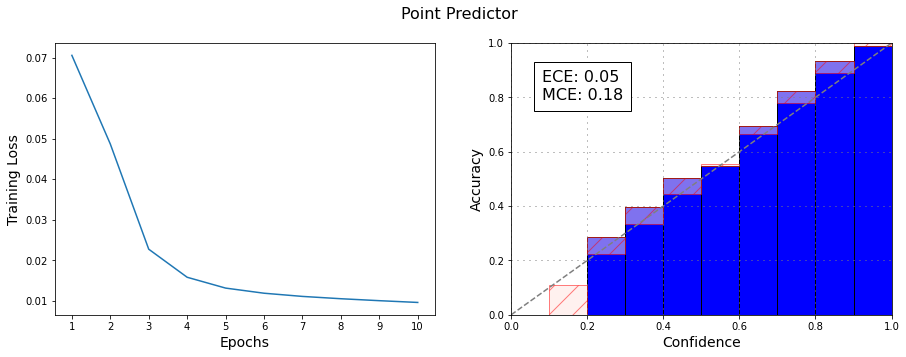

In [34]:
exp.eval_model("Point Predictor", pp, losses, 1, testloader, device)

Test Accuracy: 0.14480000734329224


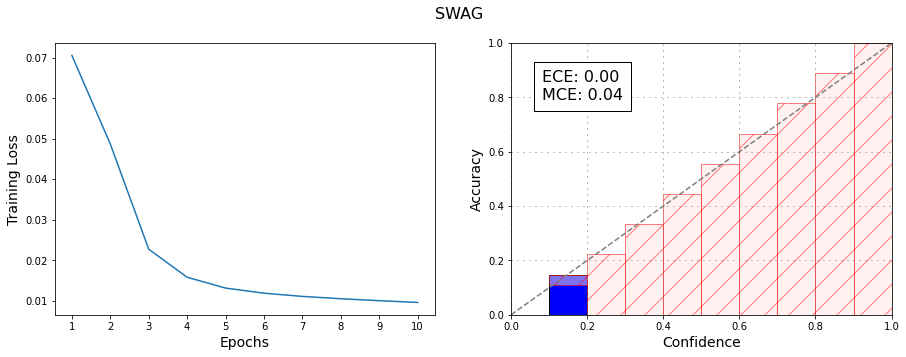

In [78]:
exp.eval_model("SWAG", swag, swag_losses, 100, testloader, device)

In [77]:
dist = torch.distributions.LowRankMultivariateNormal(torch.zeros(2), torch.tensor([[1.], [0.]]), torch.tensor([1., 1.]))
dist.sample()

tensor([0.3377, 0.5227])